In [11]:
import datetime
print("Made by Conor Bailey(cpb_32)")
print("Last modified: ", datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S") + "\n")

Made by Conor Bailey(cpb_32)
Last modified:  15/12/2021 00:11:00



- **(2-4):** Run your implementation of the Hebb rule on `data_HL_simple.txt`, and inspect the weights $w$ after every step of the algorithm. Identify the correlational pattern that the algorithm discovers. Are there any positively or negatively correlated features in these data according to the pattern seen in $w$?

The weights seem to show correlations going both positive and negitive based on the random weight sets. They steadily increase or decrease accordingly. The final weights result with roughly 0.8 (whether positive or negative) consistantly being achieved, assuming the relationship with the data being a steady influence.

In [3]:
import numpy as np

# load data from the text file
data = np.loadtxt('data_HL_simple.txt', usecols=range(5))
print(data[1:5,:])

# we need a vector of 5 parameters
w = np.random.normal(0, 0.5, 5)

print("Initial weights")
print(w)

# learning rate; don't change the learning rate epsilon when you are working on questions 2 and 3
epsilon = 0.01

num_iterations = 6

update = 0
# we can do a fixed number of iterations because the simple Hebb rule won't converge
for i in range(num_iterations):
    for x in data:

        # DONE: add your code here; note that "epsilon"
        # is defined above and it should be used here;
        # don't change its default value in this question.
        
        y = np.dot(x, w) #Working out linear activation based on the current input and weights
        w2 = epsilon * x * y #Finding the weight difference finding the epsilon as the learning rate by current input and linear activation 
        w = w + w2 #Changing the weight based on the previous weight
        
        update = update + 1
        if update % 10 == 0:
            # print every 10th update
            print("\tCurrent input: " + str(x))
            # print the weights for every x to see how they are evolving
            print("New Weights:\n" + str(w))

# the final weights
print(w)
print(np.corrcoef(x.T, w.T)) #Making the correlation matrix based on the final input and the weight

[[-1.  0. -1. -1.  1.]
 [-1. -1. -1. -1.  1.]
 [ 1.  0.  1.  1. -1.]
 [ 0. -1.  0.  0.  0.]]
Initial weights
[-0.24212451  0.08506126  0.10652521 -0.26401638 -0.51251771]
	Current input: [0. 0. 0. 0. 0.]
New Weights:
[-0.23595786  0.0929065   0.12492161 -0.24561997 -0.53091411]
	Current input: [-1.  0. -1. -1.  1.]
New Weights:
[-0.23705803  0.09650565  0.14263967 -0.22790192 -0.54863216]
	Current input: [0. 1. 0. 0. 0.]
New Weights:
[-0.24230567  0.09552486  0.16202533 -0.20851626 -0.56801783]
	Current input: [ 0.  0.  1.  1. -1.]
New Weights:
[-0.25959786  0.10622004  0.20544139 -0.1651002  -0.61143388]
	Current input: [ 1.  1.  1.  1. -1.]
New Weights:
[-0.25303293  0.1031822   0.24894108 -0.12160051 -0.65493357]
	Current input: [0. 0. 0. 0. 0.]
New Weights:
[-0.22844631  0.12123131  0.30031496 -0.07022663 -0.70630745]
	Current input: [-1.  0. -1. -1.  1.]
New Weights:
[-0.21689292  0.13226575  0.34641998 -0.02412161 -0.75241248]
	Current input: [0. 1. 0. 0. 0.]
New Weights:
[-0.220

- **(3-4):** The next step requires coding. Extend the code that implements simple Hebbian learning above and implement Oja's rule to learn one principal component for these data. We are interested in exactly one principal component in this exercise. Your implementation of Oja's rule should appear in the Python block below.

- **(3-5):** Run your implementation of Oja's rule on `data_two_groups.txt`. Use the vector of parameters $w$ that you will obtain using Oja's rule to project the original five-dimensional data into 1 dimension defined by $w$. The image that you will obtain should be similar to the one produced by PCA in `sklearn` above. The images will be identical if you have run Oja's rule until convergence. This step will allow you to see very clearly how a low dimensional representation (and hence data compression) can be achieved using Hebbian learning/Oja's rule or PCA.

[ 0.08381131  0.11480017 -0.4005318  -0.42272681 -0.80897229]


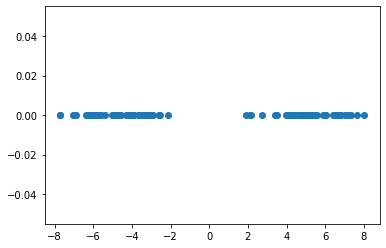

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# load data from the text file
data = np.loadtxt('data_two_groups.txt', usecols=range(5))

# Implement Oja's rule here extending your previous implementation
# of the simple Hebb rule. Note that this question on Oja's rule
# uses a different dataset. So, don't forget to change the dataset
# after you have copied the code to this block.

w = np.random.normal(0, 0.5, 5) #Random weights

# learning rate
epsilon = 0.01

num_iterations = 6

update = 0
# we can do a fixed number of iterations because the simple Hebb rule won't converge
for i in range(num_iterations):
    for x in data:
        
        y = np.dot(x, w) #Working out linear activation based on the current input and weights
        w2 = epsilon * (x * y - (y ** 2) * w) # Oja's rule
        w = w + w2 #Changing the weight based on the previous weight
        
        update = update + 1

# the final weights
print(w)

#Plotting data on scatter
x = (data@ w) #Matmul for data and weights as they're 2D arrays

plt.figure(1)
y = np.zeros(x.shape[0]) #Creating a vector of zeros
plt.scatter(x, y)
plt.show()

- **(1-2):** In the code below, identify Python variables that correspond to the symbol $y_j$ in our lecture notes. What is the range of $j$ in this example? How does the number of values of $y_j$ for every $j$ relate to the number of data examples?


Within the given example X_pca is $y_j$, based on the transform performed as part of the equation the range of $j$ is 0 and 1.
Changing the values of $y_j$ will change the dimensions of the scatter, $j$ as -1 and 1 it changes to 1d rather than 2d.

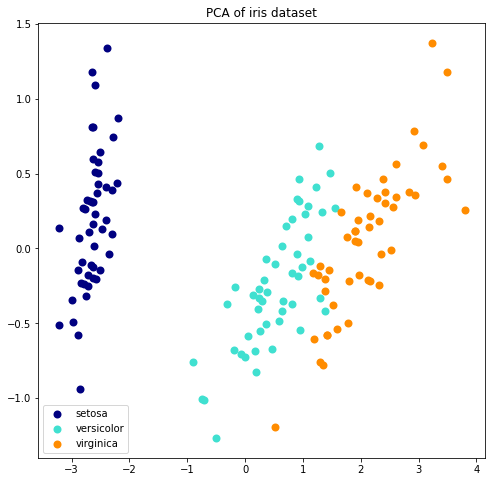

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# load the data from sklearn
iris = load_iris()

# X is np.ndarray and it contains four predictor attributes
X = iris.data
y = iris.target

# print descriptive statistics using pandas data frame
df_X = pd.DataFrame(X)

# the number of principal components
n_components = 2

pca = PCA(n_components=n_components)

# We fit the model and then transform the data.

# Fit the model to the data; this is where PCA will do what Hebbian learning does to compute one principal component
pca.fit(X)

# we can now transform the data and project it to 2 dimensions.
X_pca = pca.transform(X)

colors = ['navy', 'turquoise', 'darkorange']
title = "PCA"

plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    # note that y are targets defined above
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                    color=color, lw=2, label=target_name)

plt.title(title + " of iris dataset")
plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show()

- **(3-1)** Compute `data_rec`, which is the reconstruction of the original data from its compressed 1D representation that is stored in `data_pca`.

[[1.03073034 0.50488764]
 [0.73073034 0.35488764]
 [1.21073034 0.50488764]
 [1.46073034 1.55488764]
 [0.66073034 0.50488764]]
the parameters/axis
[[0.86285419 0.50545291]]
data_pca is the 1D representation of our data:
[[0.80989272]
 [1.29988067]
 [2.04631978]
 [0.82531087]]


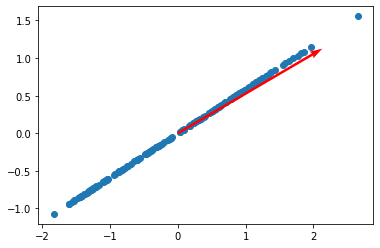

In [10]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt

wine = load_wine()
#dfwine = pd.DataFrame(wine.data, columns=wine.feature_names)
#print(dfwine.corr())

# we select 2 features that are correlated in this dataset
ind = [wine['feature_names'].index('flavanoids'), wine['feature_names'].index('total_phenols')]
data = wine.data[:,ind]
# we centre the data to make the code below simpler
data = data - np.mean(data, axis=0)
print(data[0:5,:])

# we will extract 1 component; note that our data is 2D
n_components = 1

pca = PCA(n_components=n_components)

# We fit the model and transform the data in one line.
data_pca = pca.fit_transform(data)
print("the parameters/axis")
print(pca.components_)
print("data_pca is the 1D representation of our data:")
print(data_pca[1:5])

data_rec = pca.inverse_transform(data_pca) #reconstructing data_pca as 1D data

# plot the data with the first PC
plt.scatter(data_rec[:,0], data_rec[:,1]) #displaying data_rec
plt.quiver(pca.components_[0][0], pca.components_[0][1], color=['red'], scale=2)
plt.show()

# data is the original data, and data_pca is the low dimensional representation of the data
# your next step is to compute data_rec, which will be the reconstruction of the original data using data_pca
# we are interested in the errors between data and data_rec

- **(3-2)** Explain the difference between `data` and `data_rec`, and the role of `data_pca` in this relationship. In this question, you are only asked to interpret the result and the variables in question.

Data runs a 2D scatter ranging the same as that in data_rec, which is the 1D equivalent. Data_rec is the restoration of data_pca displayed as a full 1D scatter when computed, which just shows the more recent point, in this example being a point between 0.8 and 1.2. 